In [567]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
#import seaborn as sns

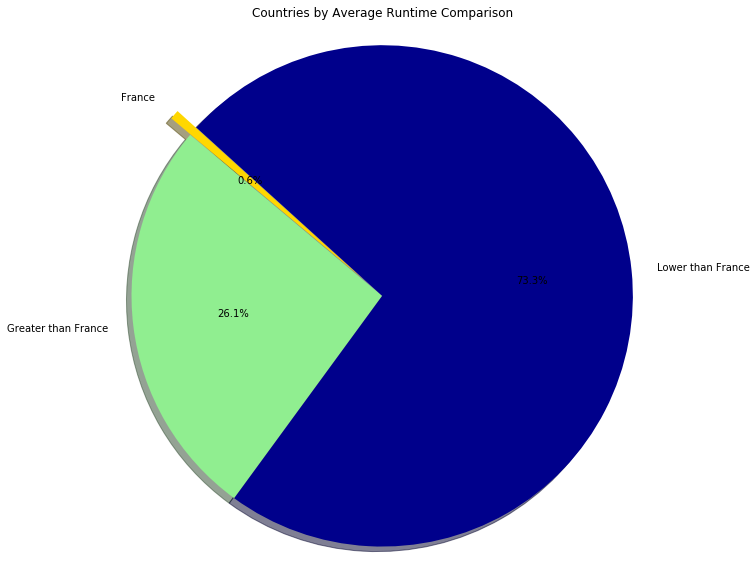

In [571]:
df=pd.read_csv("movies.csv")
##Split country with comma delimeter
df['Country']= df['Country'].str.split(',')
df=df.explode('Country')
df=df.dropna(subset=['Runtime'])
##calculate mean
df=df.groupby('Country')['Runtime'].mean().reset_index()
##Create new colum with name Runtime_Average
df = df.merge(df, on='Country', suffixes=('', '_Average'))
##df = df.drop_duplicates(subset='Country')

##Calculate  Mean of France Data
france_mean_runtime = df[df['Country'] == 'France']['Runtime'].mean()
##Calculate mean other than France
mean_runtime_by_country = df[df['Country'] != 'France'].groupby('Country')['Runtime'].mean()
mean_runtime_by_country
###Calculate the mean Greater than France
greater_than_france = mean_runtime_by_country[mean_runtime_by_country > france_mean_runtime]
###Calculate the mean Less than France
lower_than_france = mean_runtime_by_country[mean_runtime_by_country < france_mean_runtime]
###Calculate the mean of France
france = df[df['Country'] == 'France']

##Calculate the len of the mean that is greater than France
count_Greater_france=len(greater_than_france)
##print(count_Greater_france)
##Calculate the len of the mean that is Smaller than France
count_Smaller_france=len(lower_than_france)
##print(count_Smaller_france)
##Calculate Length of France
count_Len_france=len(france)
##print(count_Len_france)

# Create data for the pie chart
sizes = [count_Greater_france, count_Smaller_france, count_Len_france]
labels = ['Greater than France', 'Lower than France', 'France']
colors = ['lightgreen', 'darkblue', 'gold']
explode = (0, 0, 0.1)  # Explode the 1st slice (Greater than France)
# Create a pie chart
plt.figure(figsize=(10, 10))
plt.pie(sizes, labels=labels, colors=colors, explode=explode, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Countries by Average Runtime Comparison')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


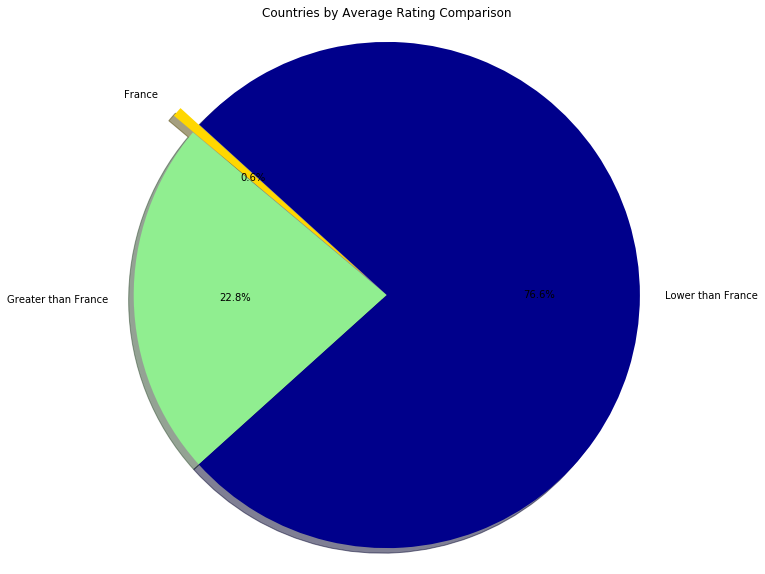

In [572]:
df=pd.read_csv("movies.csv")
##explode by Rotten Tomatoes
df=df.explode('Rotten Tomatoes')
df=df.dropna(subset=['IMDb'])
##Assign 0 in Rotten Tomatoes because when we add this withI MDb nan create issue
df['Rotten Tomatoes'].fillna(0,inplace=True)
##convert Rotten Tomatoes into float by div(10)
df['Rotten Tomatoes'] = df['Rotten Tomatoes'].str.rstrip('%').astype(float).div(10)
df['Rotten Tomatoes'].fillna(0,inplace=True)
df['IMDb'].fillna(0,inplace=True)
#print(df['IMDb'])
##Rotten Tomatoes and IMDb both are  rating catagory, so we add this and store into new colum named as Rating
df['Rating']=df['Rotten Tomatoes']+ df['IMDb']
##Covert country into list
df['Country']= df['Country'].str.split(',')
df=df.explode('Country')
##df = df.drop_duplicates(subset='Country')
##print(df)

##Calculate  Mean of France Data
france_mean_runtime = df[df['Country'] == 'France']['Rating'].mean()
#print(france_mean_runtime)
##Calculate mean other than France
mean_runtime_by_country = df[df['Country'] != 'France'].groupby('Country')['Rating'].mean()

##overall_Mean=mean_runtime_by_country.mean()
###Calculate the mean Greater than France
greater_than_france = mean_runtime_by_country[mean_runtime_by_country > france_mean_runtime]
##print(greater_than_france)
###Calculate the mean Less than France
lower_than_france = mean_runtime_by_country[mean_runtime_by_country < france_mean_runtime]
#print(lower_than_france)
###Calculate the mean of France
##france = df[df['Country'] == 'France']
##print(france['Rating'])

##Calculate the len of the mean that is greater than France
count_Greater_france=len(greater_than_france)
##print(count_Greater_france)
##Calculate the len of the mean that is Smaller than France
##count_Smaller_france=len(lower_than_france)
##print(count_Smaller_france)
##Calculate Length of France
count_Len_france=1
#print(count_Len_france)

# Create data for the pie chart
sizes = [count_Greater_france, count_Smaller_france, count_Len_france]
labels = ['Greater than France', 'Lower than France', 'France']
colors = ['lightgreen', 'darkblue', 'gold']
explode = (0, 0, 0.1)  # Explode the 1st slice (Greater than France)
##Create a pie chart
plt.figure(figsize=(10, 10))
plt.pie(sizes, labels=labels, colors=colors, explode=explode, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Countries by Average Rating Comparison')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

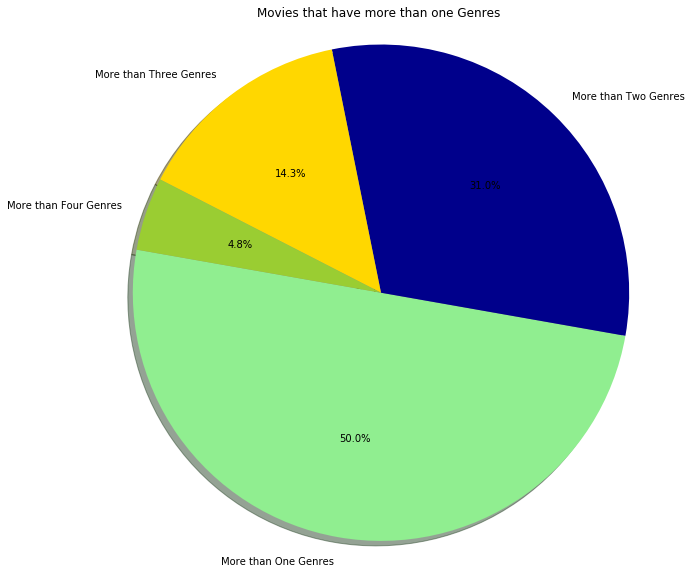

In [573]:
df=pd.read_csv("movies.csv")
##explode by country name
df=df.explode('Country')
df=df.dropna(subset=['Genres'])
##df=df['Genres'].dropna()
##print(df)
##print(len(df['Genres']))

df=df[df['Country'] == 'France']
# Check if France movies have more than one genre
df['GenreCount'] = df['Genres'].str.count(',') + 1  # Adding 1 to account for single-genre movies
#Count movies that more than one, two, or three genres
genre_counts= (df['GenreCount'].value_counts())
##Convert genre_counts into list
sizes=genre_counts.tolist()
##Ignore Movies that have only one Genre 
sizes=[sizes[1],sizes[2],sizes[3],sizes[4]]
##print(len(sizes))
##Labeling 
labels = ['More than One Genres', 'More than Two Genres', 'More than Three Genres','More than Four Genres']
colors = ['lightgreen', 'darkblue', 'gold','yellowgreen']
explode = (0, 0, 0,0)  # Explode the 1st slice (Greater than France)
##Create a pie chart
plt.figure(figsize=(10, 10))
plt.pie(sizes, labels=labels, colors=colors, explode=explode, autopct='%1.1f%%', shadow=True, startangle=170)
plt.title('Movies that have more than one Genres')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()



